# <p style="background-color:  #00008B; font-family:newtimeroman;font-size:180%;color:#FFF9ED;text-align:center;border-radius:80px 20px;"><b>Adult Income Prediction Project<img style="width: 70x;"  style="position: absolute; right: 5px; top: 60%; transform: translateY(-70%);"> </div> 

<p style="text-align: center;"><img src=".png" style="width: 100%; height: 500px; object-fit: cover;">
</p>

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than or equal USD 50k and group 2 has an income of more than to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Import Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [27]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [28]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [29]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [30]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
missing_val = (df == '?').sum()

# Replace '?' with NaN (Not a Number)
df.replace('?', np.nan, inplace=True)

print("Missing values in data :")
print(missing_val[missing_val > 0])

Missing values in data :
workclass         1836
occupation        1843
native.country     583
dtype: int64


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education.num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital.gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital.loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours.per.week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [33]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

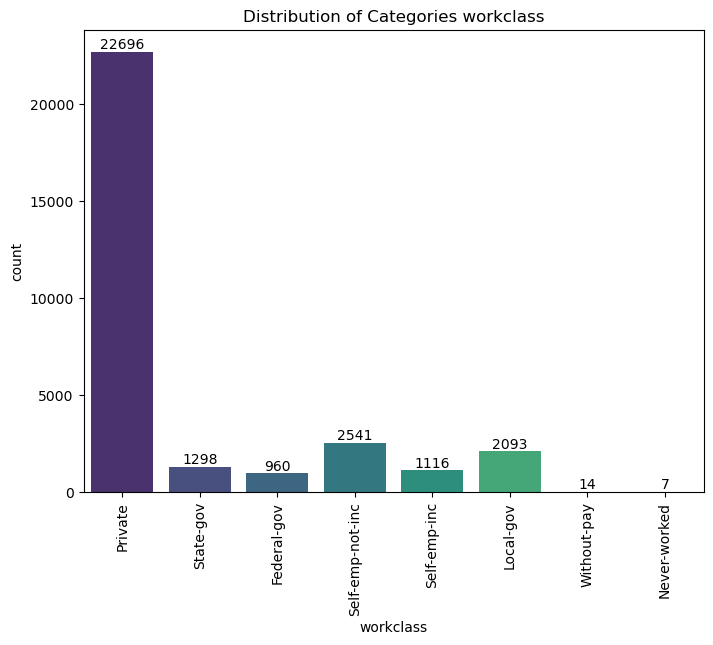

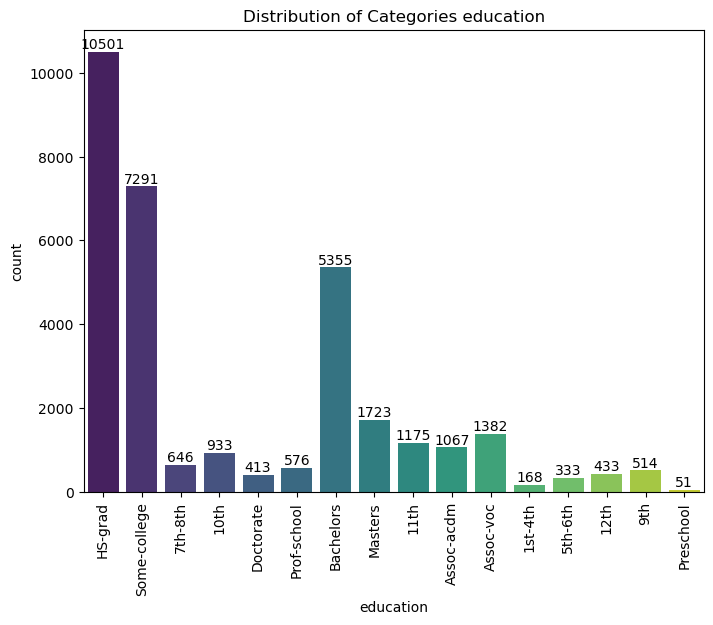

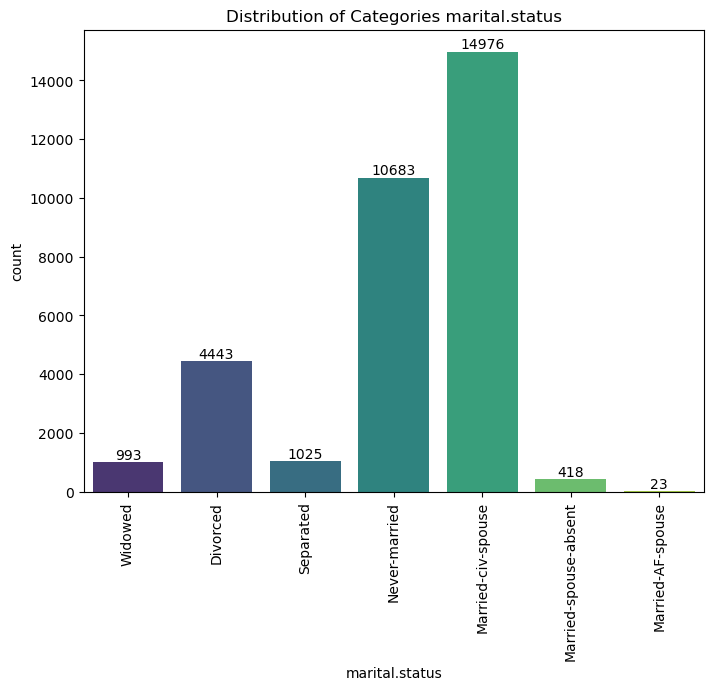

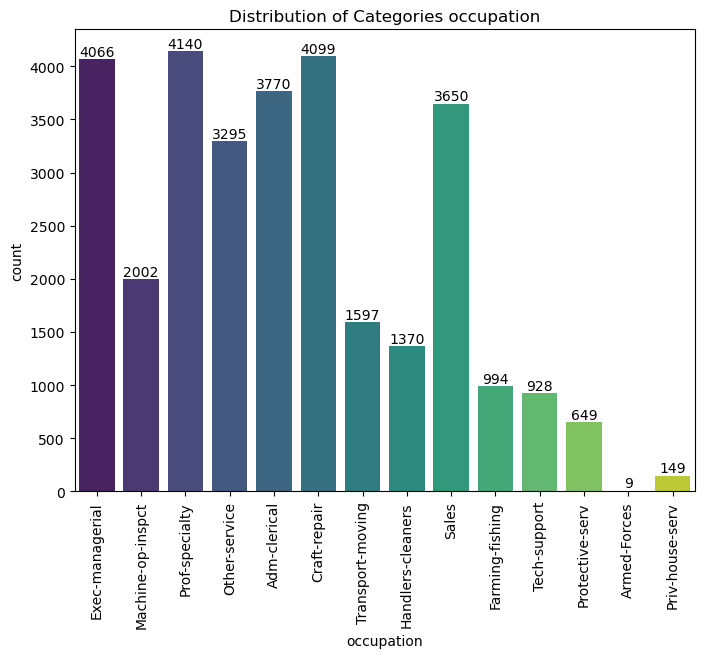

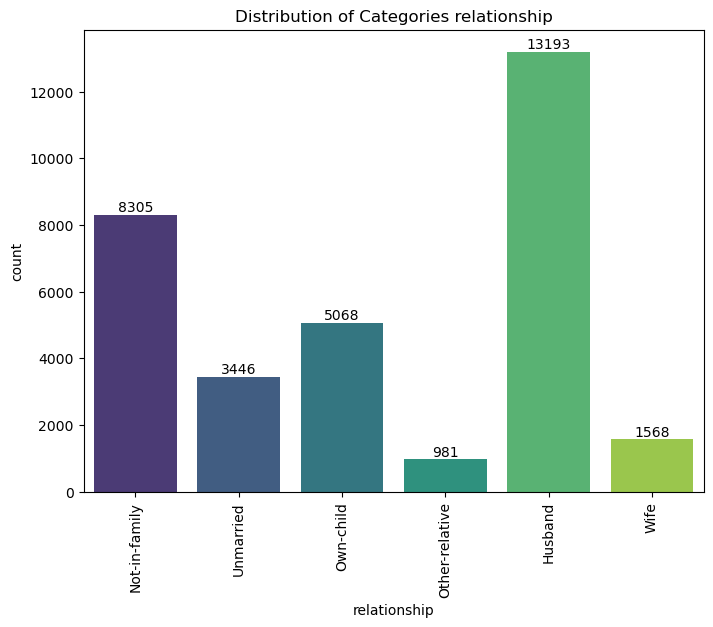

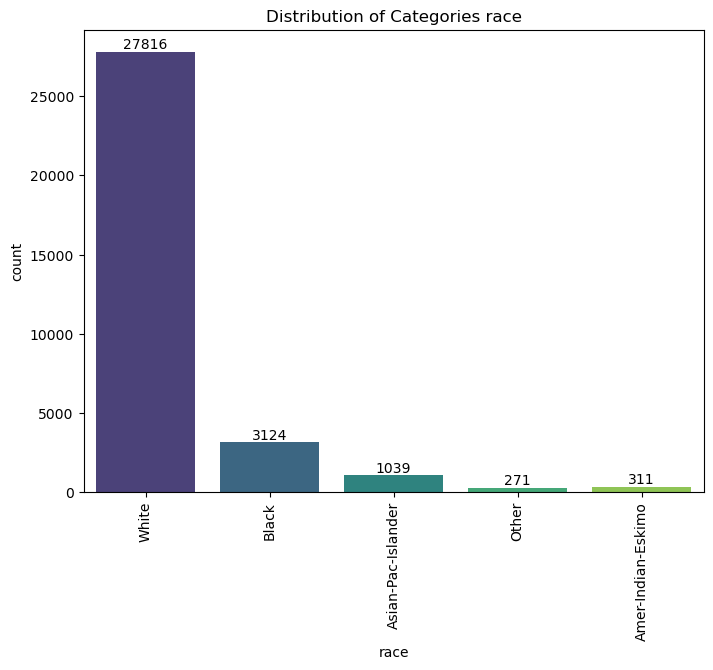

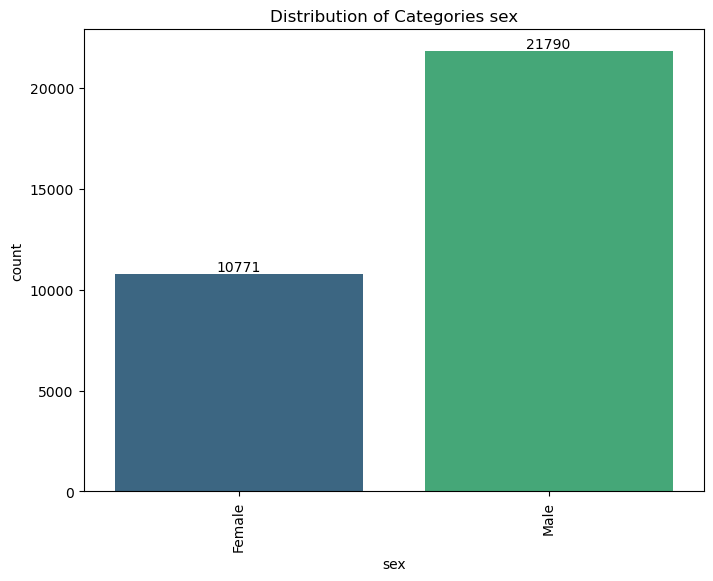

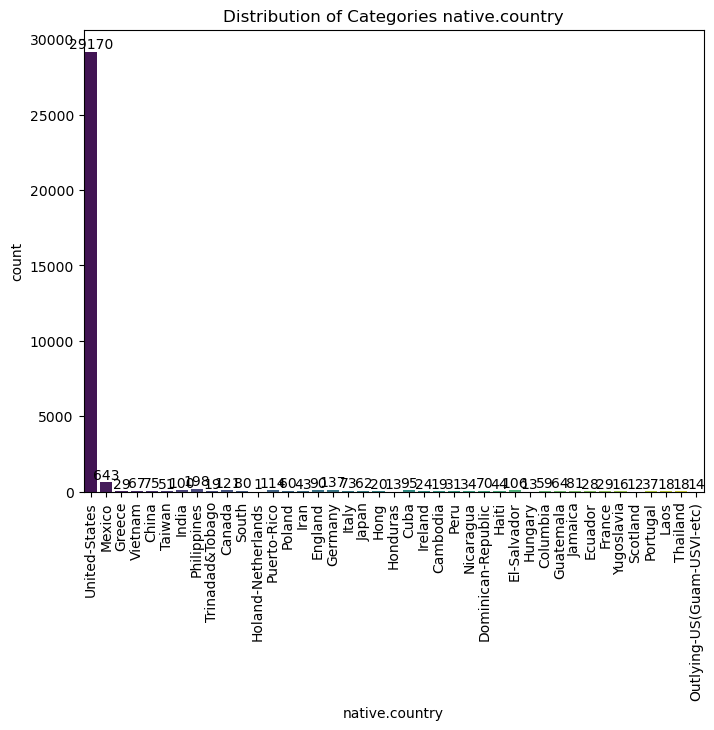

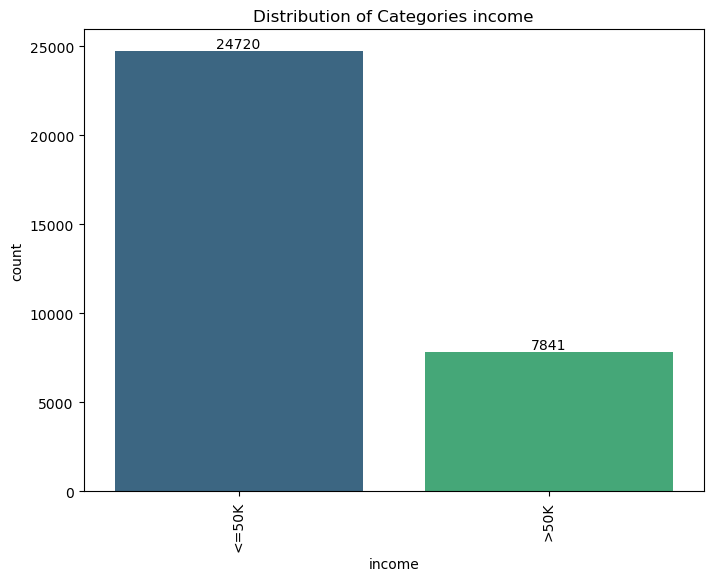

In [34]:
# Kategorik feature ların dağılımını göstermek için;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [35]:
species_count = df['income'].value_counts().reset_index()
species_count.columns = ['income', 'count']

fig = px.bar(species_count, x='income', y='count', text='count', color='income')

fig.update_traces(texttemplate='%{text}', textposition='outside')

In [36]:
species_sex_count = df.groupby(['income', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='income', y='count', color='income', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

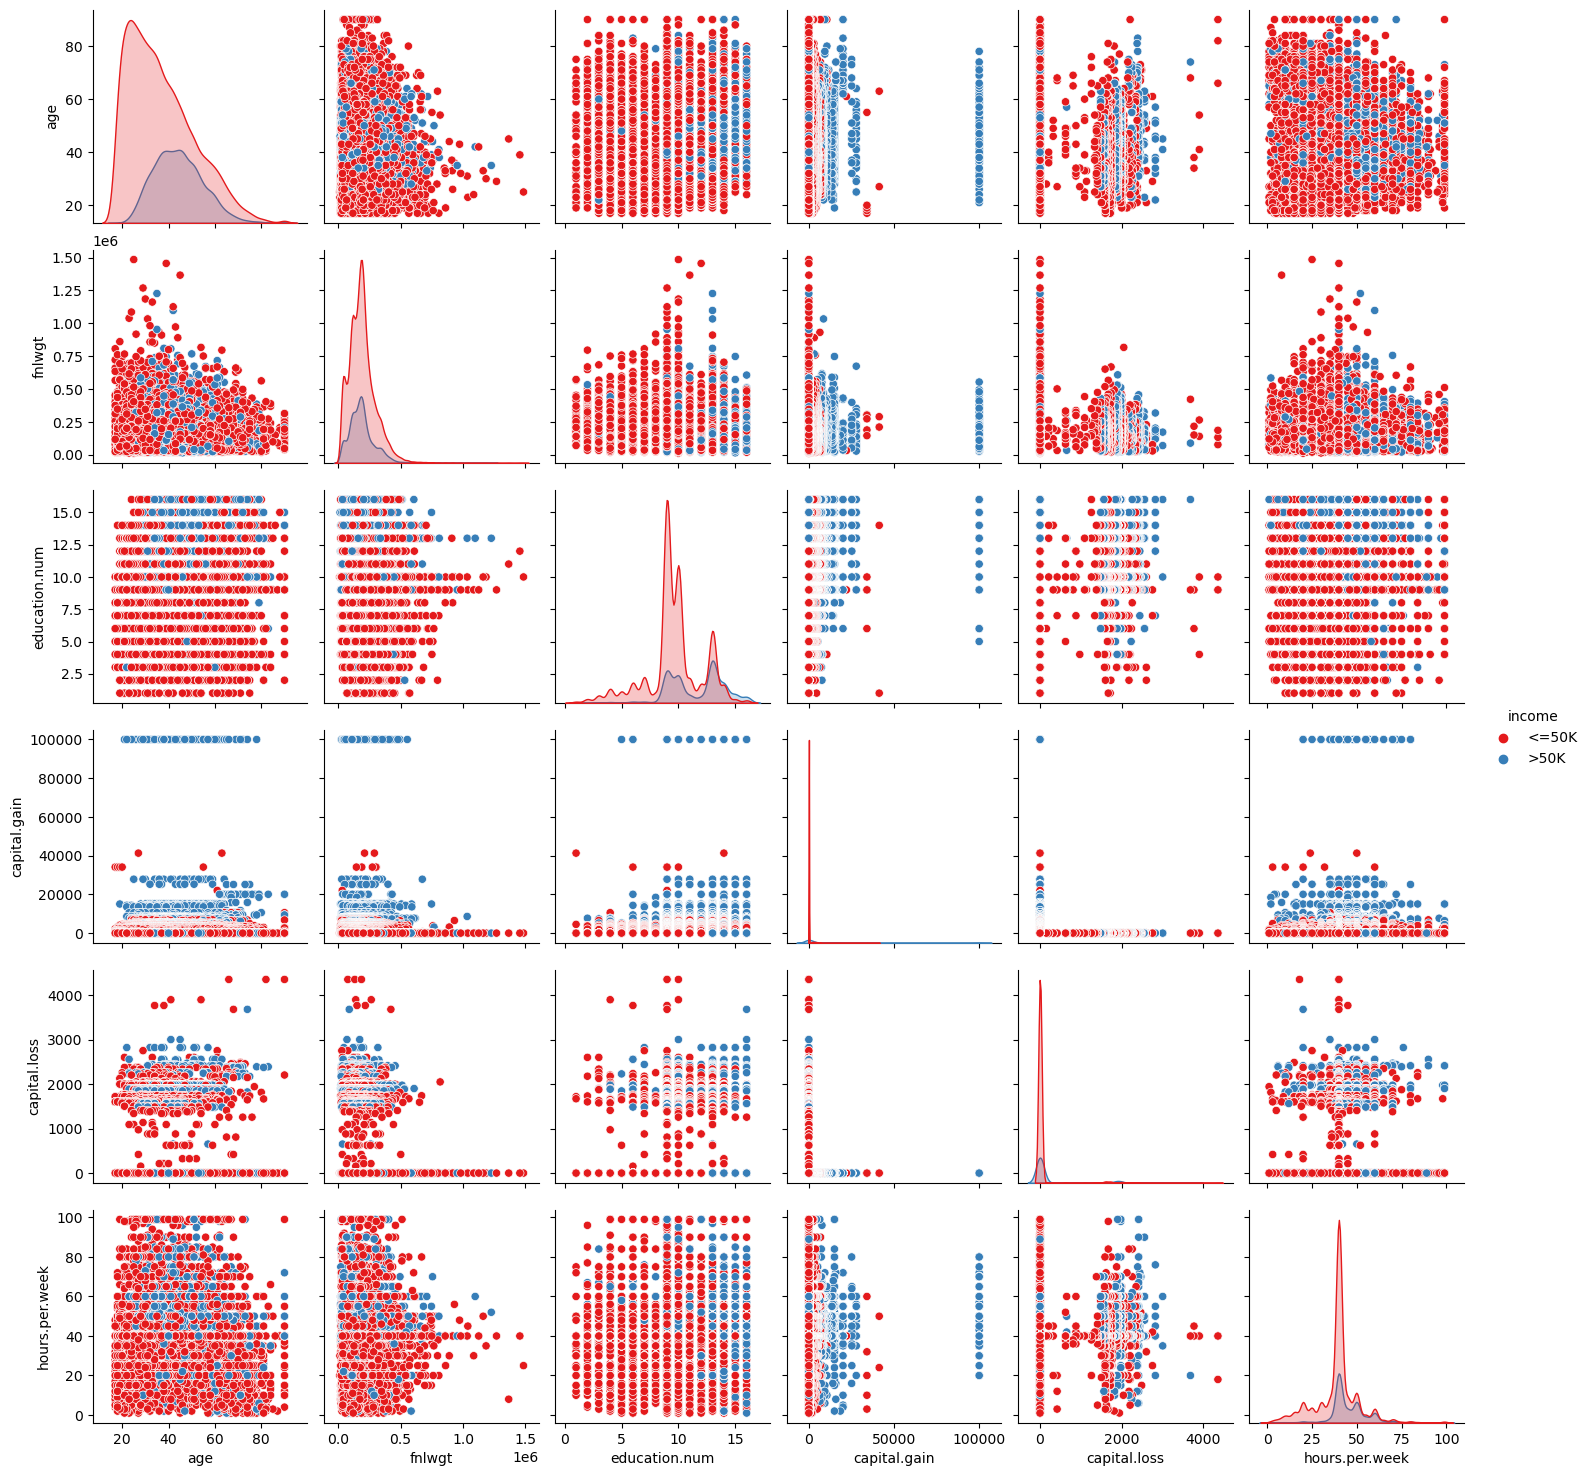

In [37]:
sns.pairplot(df, hue="income", palette="Set1");

In [38]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

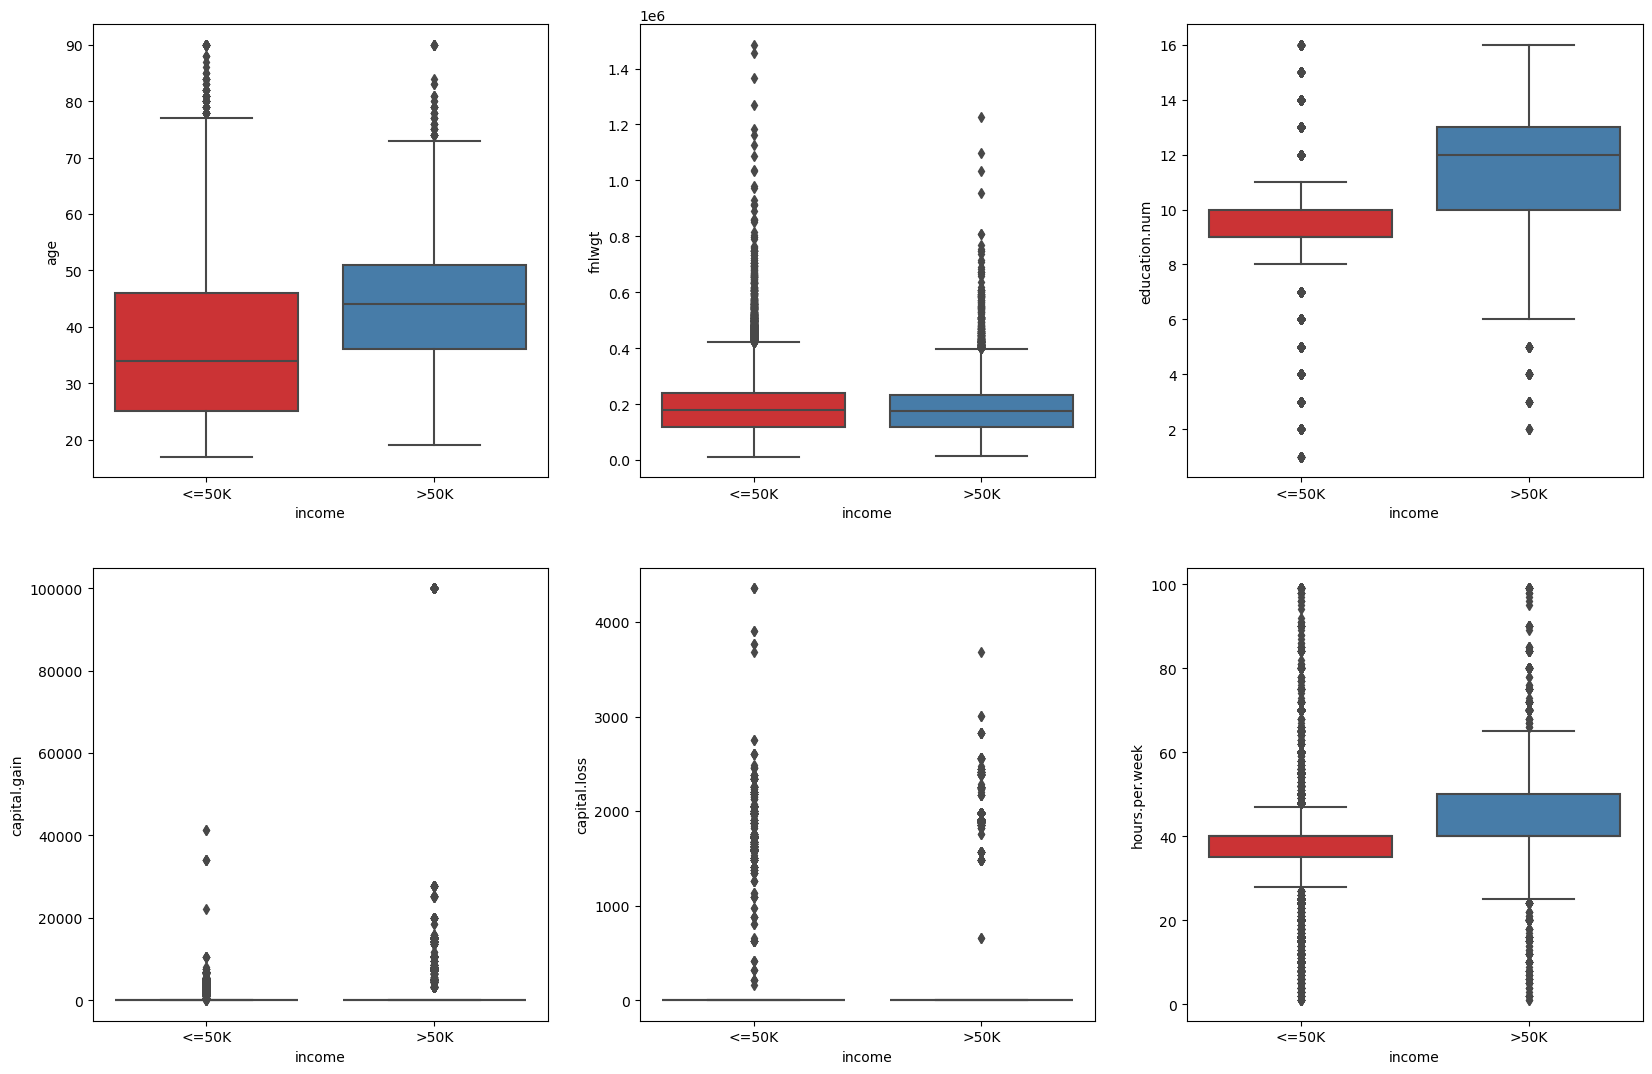

In [39]:
index = 0
plt.figure(figsize=(20,20))
for feature in num_features:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=df, palette='Set1')
plt.show()

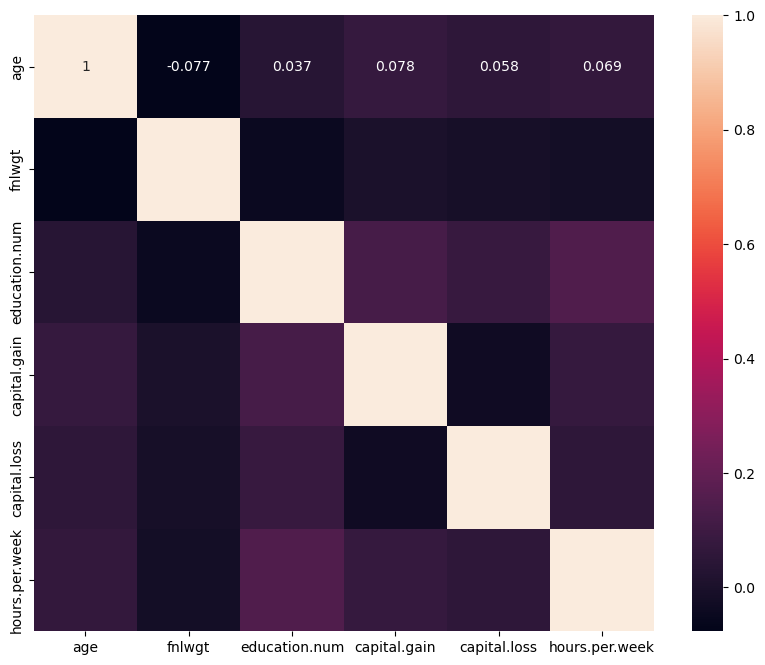

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot = True);

In [41]:
df["income"] = df['income'].map({'>50K': 1, '<=50K': 0})

In [42]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [43]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df)

         age workclass     fnlwgt     education  education.num  \
0     90.000   Private  77053.000       HS-grad          9.000   
1     82.000   Private 132870.000       HS-grad          9.000   
2     66.000   Private 186061.000  Some-college         10.000   
3     54.000   Private 140359.000       7th-8th          4.000   
4     41.000   Private 264663.000  Some-college         10.000   
...      ...       ...        ...           ...            ...   
32556 22.000   Private 310152.000  Some-college         10.000   
32557 27.000   Private 257302.000    Assoc-acdm         12.000   
32558 40.000   Private 154374.000       HS-grad          9.000   
32559 58.000   Private 151910.000       HS-grad          9.000   
32560 22.000   Private 201490.000       HS-grad          9.000   

           marital.status         occupation   relationship   race     sex  \
0                 Widowed     Prof-specialty  Not-in-family  White  Female   
1                 Widowed    Exec-managerial  Not-i

# Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
X = df.drop('income', axis=1)
y = df['income']

## Train | Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [47]:
X_train.shape

(26048, 14)

In [48]:
X_test.shape

(6513, 14)

In [49]:
cat = X_train.select_dtypes("object").columns
cat

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [50]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())


In [51]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.332,-0.127,1.133,-0.147,-0.218,-0.034
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-1.066,0.257,-0.419,-0.147,-0.218,1.589
2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.034,-0.791,-0.419,-0.147,-0.218,-0.034
3,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.773,-1.015,-0.031,-0.147,-0.218,-0.034
4,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.282,-0.863,-2.359,-0.147,-0.218,-0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.869,0.197,1.133,-0.147,-0.218,-0.034
26044,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.186,-0.374,1.909,-0.147,-0.218,0.777
26045,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.993,0.625,1.133,-0.147,-0.218,-0.034
26046,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-1.506,-0.312,-1.195,-0.147,-0.218,-0.034


In [52]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=42))]

pipe_log = Pipeline(steps=operations)

In [53]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('log_model', LogisticRegression(random_state=42))])

In [54]:
y_pred = pipe_log.predict(X_test)
y_pred_proba = pipe_log.predict_proba(X_test)

In [55]:
my_dict = {"actual": y_test}

In [56]:
result_log = pd.DataFrame(my_dict)
result_log

,actual
10489,0.000
25652,0.000
12243,1.000
25487,1.000
5091,0.000
...,...
6092,1.000
28260,0.000
2419,1.000
32531,0.000


In [57]:
result_log["pred"] = y_pred
result_log

,actual,pred
10489,0.000,0.000
25652,0.000,0.000
12243,1.000,1.000
25487,1.000,0.000
5091,0.000,0.000
...,...,...
6092,1.000,1.000
28260,0.000,0.000
2419,1.000,1.000
32531,0.000,0.000


In [58]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_log)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

ModuleNotFoundError: No module named 'yellowbrick'

In [59]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [60]:
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[4609  336]
 [ 627  941]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4945
         1.0       0.74      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513


Train_Set
[[18421  1354]
 [ 2522  3751]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     19775
         1.0       0.73      0.60      0.66      6273

    accuracy                           0.85     26048
   macro avg       0.81      0.76      0.78     26048
weighted avg       0.84      0.85      0.85     26048



## Cross Validate


In [61]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", 
                                                            "recall", "f1"], 
                                      cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.419,0.025,0.851,0.852,0.750,0.737,0.573,0.597,0.650,0.659
2,0.417,0.022,0.847,0.852,0.716,0.737,0.604,0.599,0.655,0.661
3,0.431,0.038,0.856,0.851,0.764,0.734,0.583,0.600,0.661,0.660
4,0.443,0.038,0.838,0.853,0.699,0.739,0.574,0.601,0.630,0.663
5,0.475,0.024,0.855,0.851,0.745,0.733,0.604,0.598,0.667,0.659
6,0.399,0.026,0.855,0.851,0.769,0.732,0.568,0.600,0.653,0.659
7,0.477,0.028,0.846,0.852,0.710,0.736,0.612,0.600,0.658,0.661
8,0.363,0.034,0.849,0.851,0.731,0.732,0.590,0.599,0.653,0.659
9,0.350,0.025,0.848,0.852,0.717,0.736,0.609,0.603,0.659,0.663
10,0.365,0.032,0.855,0.851,0.726,0.736,0.640,0.594,0.680,0.658


In [62]:
df_scores.mean()[2:]

test_accuracy     0.850
train_accuracy    0.851
test_precision    0.733
train_precision   0.735
test_recall       0.596
train_recall      0.599
test_f1           0.657
train_f1          0.660
dtype: float64

## GridSearchCV

In [63]:
from sklearn.metrics import make_scorer, f1_score

In [64]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(max_iter=5000, random_state=101))]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": C,
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}


scorer = make_scorer(f1_score, average='macro')
grid_model = GridSearchCV(estimator = model, 
                          param_grid = param_grid, 
                          cv = 10, scoring = scorer, 
                          return_train_score=True,
                          n_jobs = -1)

In [65]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                                       ('log_model',
                                        L...
             param_grid={'log_model__C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [66]:
grid_model.best_params_

{'log_model__C': 2.1544346900318834,
 'log_model__class_weight': None,
 'log_model__penalty': 'l1',
 'log_model__solver': 'saga'}

In [67]:
grid_model.best_score_

0.7806689279962779

In [68]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[4609  336]
 [ 628  940]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4945
         1.0       0.74      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513


Train_Set
[[18410  1365]
 [ 2520  3753]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     19775
         1.0       0.73      0.60      0.66      6273

    accuracy                           0.85     26048
   macro avg       0.81      0.76      0.78     26048
weighted avg       0.84      0.85      0.85     26048



## ROC (Receiver Operating Charecteristic) Curve and AUC (Area Under Curve)

In [69]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

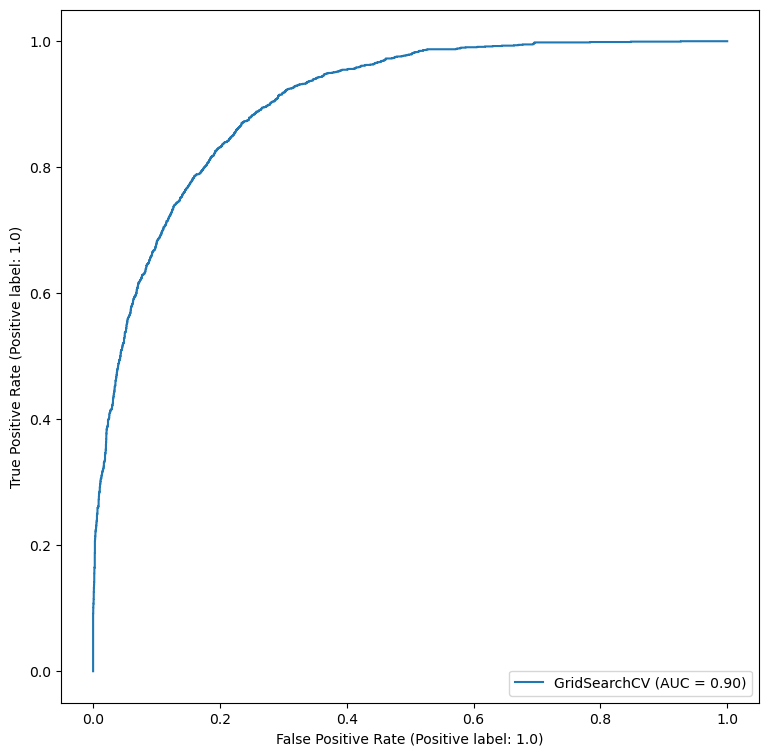

In [70]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

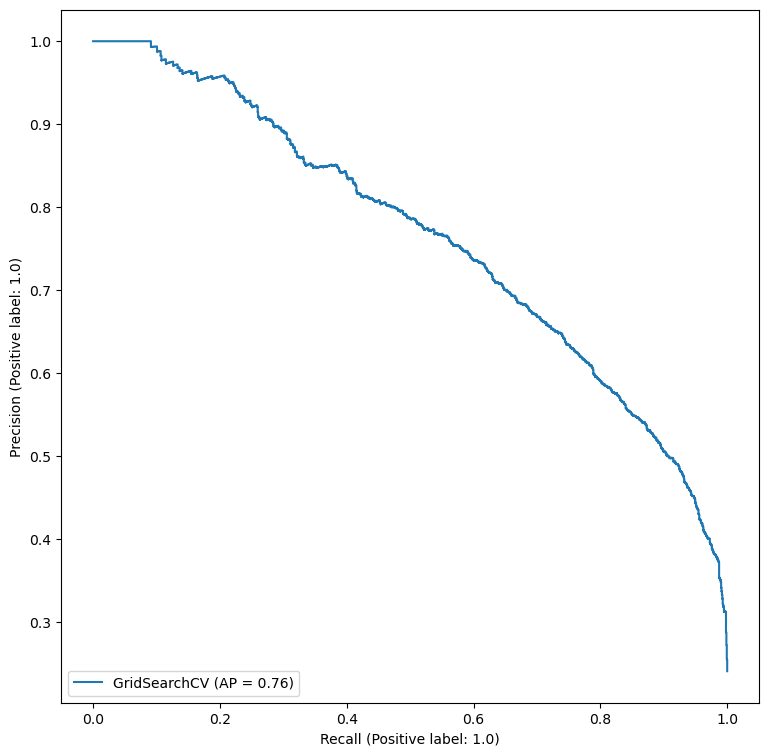

In [71]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

# K-Nearest Neighbors (KNN) Classification

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)


In [74]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('knn_model', KNeighborsClassifier())])

In [75]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

In [76]:
my_dict = {"actual": y_test}
result_knn = pd.DataFrame(my_dict)
result_knn
result_knn["pred"] = y_pred
result_knn["pred_proba"] = y_pred_proba[:,1]
result_knn

,actual,pred,pred_proba
10489,0.000,0.000,0.000
25652,0.000,0.000,0.000
12243,1.000,1.000,0.800
25487,1.000,1.000,0.800
5091,0.000,0.000,0.200
...,...,...,...
6092,1.000,0.000,0.400
28260,0.000,0.000,0.000
2419,1.000,0.000,0.400
32531,0.000,0.000,0.200


In [77]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_knn)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.poof();

ModuleNotFoundError: No module named 'yellowbrick'

In [78]:
eval_metric(pipe_knn, X_train, y_train, X_test, y_test)

Test_Set
[[4479  466]
 [ 621  947]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      4945
         1.0       0.67      0.60      0.64      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.83      0.83      0.83      6513


Train_Set
[[18518  1257]
 [ 1816  4457]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     19775
         1.0       0.78      0.71      0.74      6273

    accuracy                           0.88     26048
   macro avg       0.85      0.82      0.83     26048
weighted avg       0.88      0.88      0.88     26048



In [79]:
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.092,0.643,0.831,0.883,0.672,0.781,0.588,0.712,0.627,0.745
2,0.086,0.576,0.837,0.881,0.663,0.779,0.656,0.708,0.660,0.742
3,0.089,0.525,0.840,0.882,0.694,0.781,0.599,0.711,0.643,0.744
4,0.088,0.687,0.835,0.882,0.677,0.782,0.604,0.709,0.639,0.744
5,0.070,0.503,0.841,0.880,0.683,0.776,0.635,0.703,0.658,0.738
6,0.086,0.602,0.836,0.881,0.683,0.778,0.598,0.709,0.638,0.742
7,0.089,0.590,0.835,0.882,0.668,0.780,0.624,0.711,0.645,0.744
8,0.088,0.537,0.829,0.883,0.656,0.781,0.609,0.716,0.632,0.747
9,0.070,0.490,0.823,0.883,0.642,0.781,0.596,0.716,0.618,0.747
10,0.088,0.579,0.838,0.880,0.670,0.774,0.641,0.710,0.655,0.740


In [80]:
df_scores.mean()[2:] 

test_accuracy     0.834
train_accuracy    0.882
test_precision    0.671
train_precision   0.779
test_recall       0.615
train_recall      0.711
test_f1           0.641
train_f1          0.743
dtype: float64

In [81]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['workclass', 'education', 'marital.status', 'occupation',
          'relationship', 'race', 'sex', 'native.country'],
         dtype='object'))])),
  ('knn_model', KNeighborsClassifier())],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['workclass', 'education', 'mar

In [82]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score,precision_score, recall_score

In [83]:
hot_enc = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)
param_grid = {"knn_model__n_neighbors": range(1, 30), "knn_model__p":[1,2], "knn_model__weights":["uniform", "distance"]}

scorer = make_scorer(f1_score, average='macro')

knn_pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring=scorer)


In [84]:
knn_pipe_grid.fit(X_train, y_train)  # assuming you have X_train and y_train


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': range(1, 30),
                         'knn_model__p': [1, 2],
                         'knn_model__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, average=macro))

In [85]:
eval_metric(knn_pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4525  420]
 [ 606  962]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4945
         1.0       0.70      0.61      0.65      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.78      6513
weighted avg       0.84      0.84      0.84      6513


Train_Set
[[18304  1471]
 [ 2139  4134]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     19775
         1.0       0.74      0.66      0.70      6273

    accuracy                           0.86     26048
   macro avg       0.82      0.79      0.80     26048
weighted avg       0.86      0.86      0.86     26048



In [86]:
knn_pipe_grid.best_score_

0.7741245303426336

In [87]:
knn_pipe_grid.best_params_

{'knn_model__n_neighbors': 15,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

# Support Vector Classifier

In [102]:
from sklearn.svm import SVC

In [112]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model", SVC())]

pipe_svm = Pipeline(steps=operations)

In [113]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('svm_model', SVC())])

In [114]:
y_predict = pipe_svm.predict(X_test)
y_predict

array([0., 0., 1., ..., 1., 0., 0.])

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

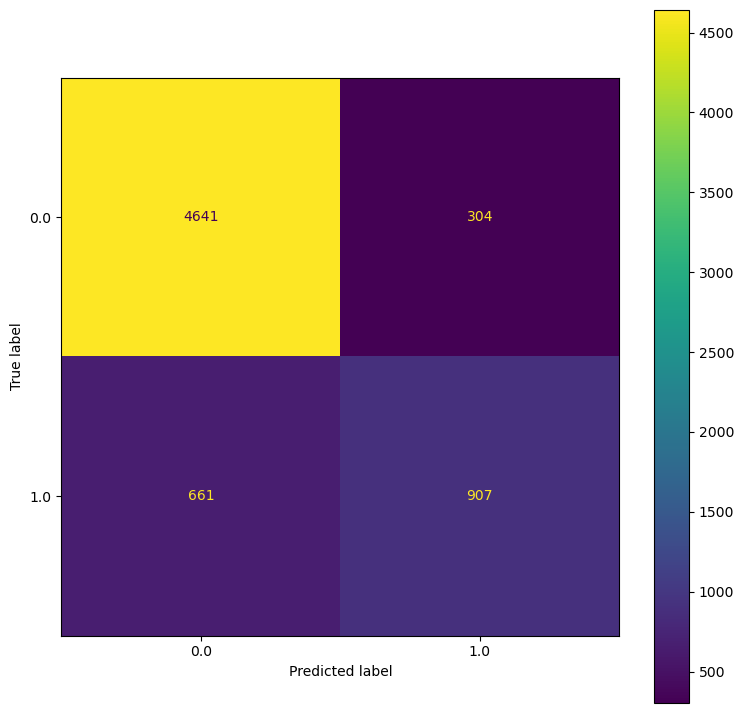

In [116]:
ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test);

In [117]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

Test_Set
[[4641  304]
 [ 661  907]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4945
         1.0       0.75      0.58      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513


Train_Set
[[18713  1062]
 [ 2430  3843]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.91     19775
         1.0       0.78      0.61      0.69      6273

    accuracy                           0.87     26048
   macro avg       0.83      0.78      0.80     26048
weighted avg       0.86      0.87      0.86     26048



In [118]:
operations = [("column_trans", column_trans), ("svm_model", SVC())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,27.741,7.724,0.850,0.867,0.740,0.793,0.579,0.608,0.650,0.688
2,27.182,9.551,0.854,0.866,0.758,0.787,0.578,0.610,0.656,0.687
3,28.792,8.112,0.860,0.866,0.778,0.784,0.588,0.614,0.670,0.689
4,27.443,7.824,0.851,0.867,0.744,0.783,0.583,0.621,0.654,0.693
5,28.132,9.766,0.857,0.866,0.747,0.786,0.615,0.607,0.675,0.685


In [119]:
df_scores.mean()[2:] 

test_accuracy     0.854
train_accuracy    0.867
test_precision    0.754
train_precision   0.787
test_recall       0.589
train_recall      0.612
test_f1           0.661
train_f1          0.688
dtype: float64

In [120]:
pipe_svm.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['workclass', 'education', 'marital.status', 'occupation',
          'relationship', 'race', 'sex', 'native.country'],
         dtype='object'))])),
  ('svm_model', SVC())],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['workclass', 'education', 'marital.status', 'oc

In [122]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("svm_model",SVC())]
pipe_svm = Pipeline(steps=operations)
param_grid = {'svm_model__C': [0.1, 1.0, 10], 'svm_model__gamma': ["auto", "scale"], 'svm_model__kernel': ["rbf", "linear"] }

#'svm_model__C': [0.1, 1, 5] first given values

scorer = make_scorer(f1_score, average='macro')

# Grid search with cross-validation
svm_pipe_grid = GridSearchCV(pipe_svm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the data


In [123]:
svm_pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                                       ('svm_model', SVC())]),
             n_jobs=-1,
             param_grid={'svm_model__C': [0.1, 1.0, 10],
                         'svm_model__gamma': ['auto', 'scale'],
                         'svm_model__kernel': ['rbf', 'linear']},
             scoring=make_scorer(f1_score, average=macro))

In [124]:
y_pred = svm_pipe_grid.predict(X_test)
y_pred

array([0., 0., 1., ..., 1., 0., 0.])

In [125]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [126]:
eval_metric(svm_pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4595  350]
 [ 621  947]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      4945
         1.0       0.73      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513


Train_Set
[[18815   960]
 [ 1924  4349]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     19775
         1.0       0.82      0.69      0.75      6273

    accuracy                           0.89     26048
   macro avg       0.86      0.82      0.84     26048
weighted avg       0.89      0.89      0.89     26048



In [127]:
svm_pipe_grid.best_score_

0.788393289893573

In [128]:
svm_pipe_grid.best_params_

{'svm_model__C': 10, 'svm_model__gamma': 'scale', 'svm_model__kernel': 'rbf'}

# FInal Model